# Week3授業課題 信用情報の分析

## 1.このテキストについて


テキストの目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.信用情報


Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

<br>
<a href="https://www.kaggle.com/c/home-credit-default-risk" style="text-decoration:none">
    Home Credit Default Risk | Kaggle
</a>

Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

1. Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

#### 1. Home Creditはどのような企業？
ノンバンク金融機関。クライアントの返済能力を予測して、多くの人がローンを利用できるよう努めている。

#### 2. このコンペティションでは何を予測する？
顧客のクレジット残高情報や未払い情報などを学習データとし、その顧客が返済能力があるか予測する。

#### 3. それを予測することで企業が得られるメリットは何？
返済能力の低い(弁済不能になる可能性のある)人を予測することで、正確に多くの人に貸し出せることができる。

返済能力がある程度ある人でも、いくらまで貸せそうかを予測できれば、適切な金額までを貸し出すことができる。

また、その収益の予測にもつなげられそう。

### データセットの準備
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。

Dataページ内の他のcsvファイルはこの課題では扱いません。

### Notebooksについて
コンペティションのNotebooksページで公開されているものを活用してください。

《推奨参考Notebooks》

<a href="https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda" style="text-decoration:none">
    Home Credit Default Risk Extensive EDA | Kaggle
</a>
<br>
<a href="https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772" style="text-decoration:none">
    HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle
</a>
<br>
<a href="https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp" style="text-decoration:none">
    HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle
</a>
<br><br>
この他タイトルにEDAと付いているものを参考にしてください。


In [3]:
# ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("../../data/home-credit-default-risk/application_train.csv")

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

【概観】
- レコード数  :307511
- カラム数    :122
  - object  : 16
  - int64   : 41
  - float64 : 65
- 欠損のある列数：64



In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [34]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [17]:
df.shape

(307511, 122)

In [11]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [39]:
def missing_data(df):
    total = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns=['Total'])
    total = total[total['Total'] > 0]
    total['Percent'] = total['Total']/df.shape[0] * 100
    return total

missing_data(df)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


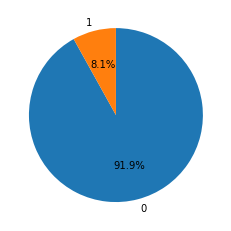

In [83]:
target_count = df['TARGET'].value_counts()

plt.pie(target_count,
        labels=target_count.index,
        startangle=90,
        counterclock=False,
        autopct='%.1f%%')
plt.show()

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

【仮説】
1. ローン与信額が高いほど返済不能に陥りやすい
- 年収が高い方が返済能力が高い
- 収入の種類（実業家、作業、産休、...）によって返済能力に差がある

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

### 仮説1 : ローン与信額が高いほど返済不能に陥りやすい
まずはローン与信額全体の分布を確認する。

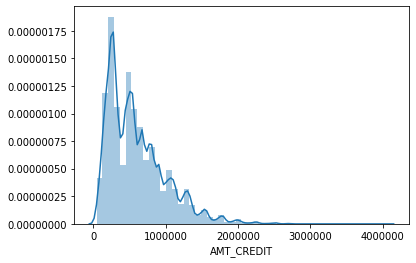

In [104]:
sns.distplot(df['AMT_CREDIT'])

返済可・不可別で分布を確認する。

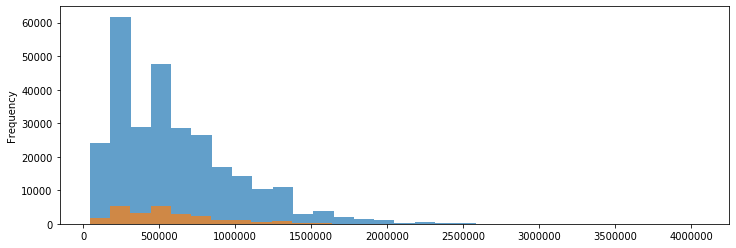

In [102]:
plt.figure(figsize=(12,4))
df['AMT_CREDIT'][df['TARGET'] == 0].plot.hist(bins=30, alpha=.7)
df['AMT_CREDIT'][df['TARGET'] == 1].plot.hist(bins=30, alpha=.7)

ラベルの不均衡が大きいため正規化して分布を確認。

「与信額が大きいから返済不可になる」という関係性は見られず、

むしろ今回のサンプルでは500000前後の方が返済不可が多く見られるケースがある。

考えられる可能性は下記。
- 与信額が大きい人は、そもそも収入や資産額が高く、返済能力が高い。
- 与信額が大きい場合は、審査も十分に行われているため、返済不可が極端に増えるリスクを抑えられている。
- つまり、与信額が大きいから返済できないのではなく、与信額が大きいから返済能力が高く、与信額が低いから返済能力が低めとなることが、可能性の一つとして考えられる。

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


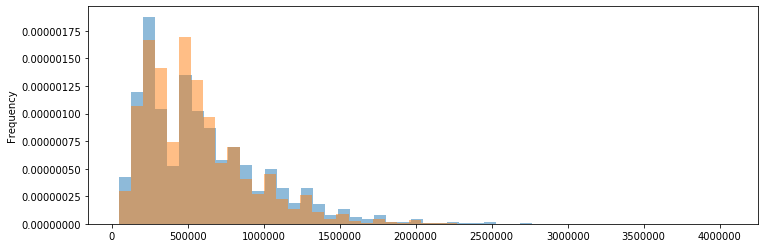

In [108]:
plt.figure(figsize=(12,4))
df['AMT_CREDIT'][df['TARGET'] == 0].plot.hist(bins=50, normed=True, alpha=.5)
df['AMT_CREDIT'][df['TARGET'] == 1].plot.hist(bins=50, normed=True, alpha=.5)

目的変数とは関係がないものの、上記の「与信額が大きい人は、そもそも収入や資産額が高く、返済能力が高い。」という仮説に関して、年収との相関を見てみる。

しかしながら、相関係数は非常に低く、線形の相関関係はないと考えられる。

In [127]:
df.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.15687
AMT_CREDIT,0.15687,1.00000


非線形の相関があるかを散布図で確認する。

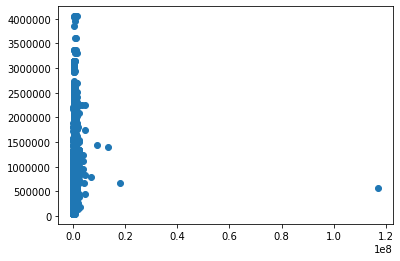

In [230]:
plt.scatter(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'])

年収の基本統計量や分布を確認してみるが、分散が非常に大きく偏りがある。

In [137]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

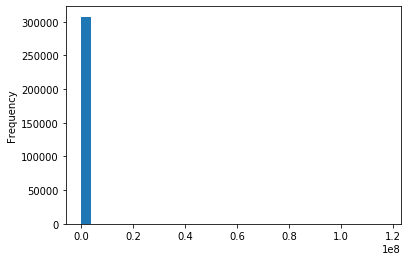

In [151]:
df['AMT_INCOME_TOTAL'].plot.hist(bins=30)

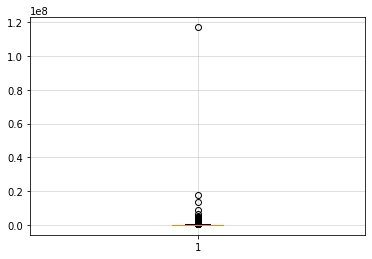

In [146]:
plt.boxplot(df['AMT_INCOME_TOTAL'])
plt.grid(True, alpha=.5)
plt.show()

年収の上位1%のデータを外れ値として除外して、再度相関を調べてみる。

しかしながら、線形・非線形の相関共に確認できなかった。

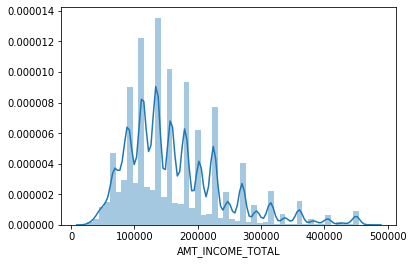

In [262]:
# 片側(上位)1%を除外
n = int(df['AMT_INCOME_TOTAL'].shape[0] * 0.99)
df2 = df.loc[:, ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'TARGET']].sort_values('AMT_INCOME_TOTAL').iloc[0:n]
sns.distplot(df2['AMT_INCOME_TOTAL'])

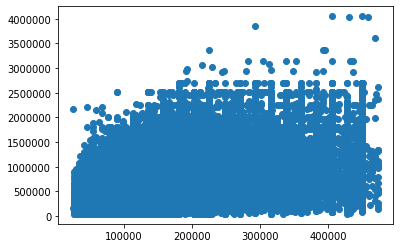

In [235]:
plt.scatter(df2['AMT_INCOME_TOTAL'], df2['AMT_CREDIT'])

In [263]:
df2.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,TARGET
AMT_INCOME_TOTAL,1.000000,0.396608,-0.021308
AMT_CREDIT,0.396608,1.000000,-0.028736
TARGET,-0.021308,-0.028736,1.000000


年収・与信額の関係を返済能力の有無別に確認するも、特に傾向は見えず。

In [271]:
# クラス別の散布図
def scatter_by_yclass(df, x1, x2, y_column):
    
    class_name = df[y_column].unique()
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    
    for i in range(len(class_name)):
        df_ = df[df[y_column] == class_name[i]]
        ax.scatter(df_[x1], df_[x2], label=class_name[i])
    
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)
    
    plt.legend(loc='best')
    plt.grid(True, alpha=.5)
    plt.show()

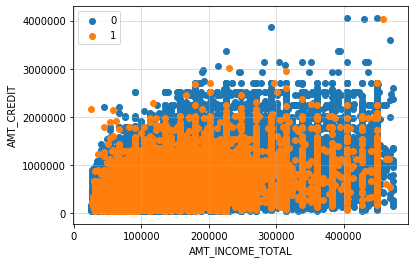

In [272]:
scatter_by_yclass(df2, 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'TARGET')

### 仮説2 年収が高い方が返済能力が高い
先ほどは年収と与信額の関係をみたが、今度は年収と目的変数との関係をみてみる。
※上限を100万ドルとする。

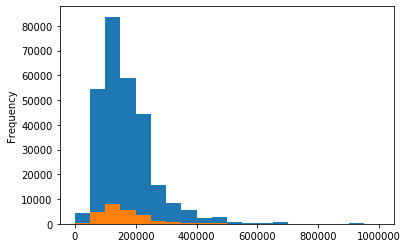

In [246]:
df['AMT_INCOME_TOTAL'][df['TARGET'] == 0].plot.hist(bins=20, range=(0, 1000000))
df['AMT_INCOME_TOTAL'][df['TARGET'] == 1].plot.hist(bins=20, range=(0, 1000000))

正規化して確認すると、返済能力の有無で分布に差がないことがわかる。

そのため、年収と返済能力の間には相関関係はそれほどないと言える。

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


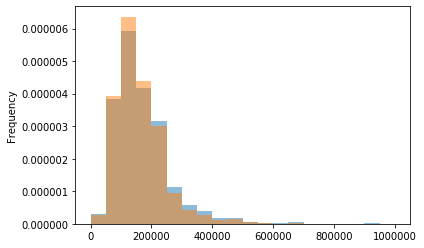

In [250]:
df['AMT_INCOME_TOTAL'][df['TARGET'] == 0].plot.hist(bins=20, normed=True, alpha=.5, range=(0, 1000000))
df['AMT_INCOME_TOTAL'][df['TARGET'] == 1].plot.hist(bins=20, normed=True, alpha=.5, range=(0, 1000000))

### 仮説3  収入の種類（実業家、作業、産休、...）によって返済能力に差がある

返済能力別の収入の種類の棒グラフを確認するが、特筆すべき傾向は見られない。

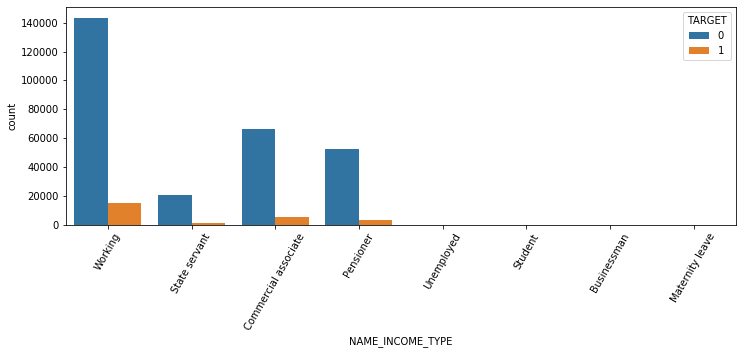

In [296]:
plt.figure(figsize=(12, 4))
sns.countplot('NAME_INCOME_TYPE', hue='TARGET', data=df)
plt.xticks(rotation=60)
plt.show()

グラフでは確認が困難なため、収入の種類別・返済能力別のデータ数を表にまとめる。

In [350]:
def cat_comparison(df, cat_name, y_column_name):
    ser = df[cat_name].value_counts().rename('Total')
    ser_0 = df[cat_name][df[y_column_name] == 0].value_counts().rename('class_0')
    ser_1 = df[cat_name][df[y_column_name] == 1].value_counts().rename('class_1')
    df = pd.concat([ser, ser_0, ser_1], axis=1)
    df['calss_0 ratio'] = df['class_0'] / df['Total'] * 100
    df['calss_1 ratio'] = df['class_1'] / df['Total'] * 100
    display(df)

cat_comparison(df, 'NAME_INCOME_TYPE', 'TARGET')

,Total,class_0,class_1,calss_0 ratio,calss_1 ratio
Working,158774,143550,15224.0,90.411528,9.588472
Commercial associate,71617,66257,5360.0,92.515743,7.484257
Pensioner,55362,52380,2982.0,94.613634,5.386366
State servant,21703,20454,1249.0,94.245035,5.754965
Unemployed,22,14,8.0,63.636364,36.363636
Student,18,18,NaN,100.000000,NaN
Businessman,10,10,NaN,100.000000,NaN
Maternity leave,5,3,2.0,60.000000,40.000000


上表より、無職(Unemployed)が返済不可となる割合はやや高く、逆に学生(Student)や実業家(Businessman)の返済不可割合は0(ゼロ)となっている。

そのため、今回のサンプルデータからは学生・実業家であれば確実に返済するとみることもできるが、

学生・実業家のサンプル数が非常に少ないため、誤差がある可能性もあるため注意が必要。

### 仮説4 既婚者の方が堅実に計画的に借りるため返済可能なケースが多い

収入の種類と同様に傾向を見ていくが、視覚的にわかるほどの大きな違いは見られない。

In [345]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

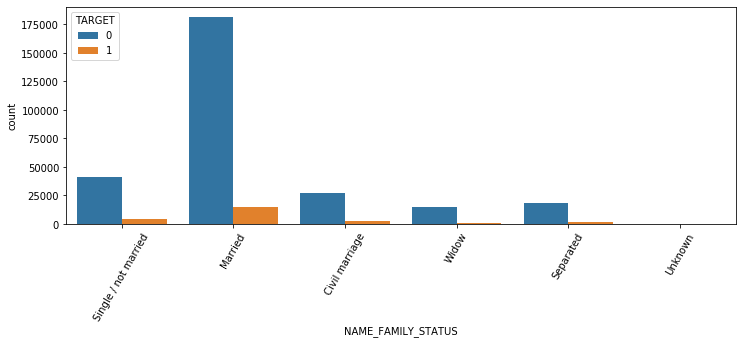

In [346]:
plt.figure(figsize=(12, 4))
sns.countplot('NAME_FAMILY_STATUS', hue='TARGET', data=df)
plt.xticks(rotation=60)
plt.show()

グラフでは詳細が不明なため、返済可否別の割合を表にまとめる。

In [352]:
cat_comparison(df, 'NAME_FAMILY_STATUS', 'TARGET')

,Total,class_0,class_1,calss_0 ratio,calss_1 ratio
Married,196432,181582,14850.0,92.440132,7.559868
Single / not married,45444,40987,4457.0,90.192325,9.807675
Civil marriage,29775,26814,2961.0,90.055416,9.944584
Separated,19770,18150,1620.0,91.805766,8.194234
Widow,16088,15151,937.0,94.175783,5.824217
Unknown,2,2,NaN,100.000000,NaN


上表より、大きな差ではないものの、未婚者よりも既婚者の方がやや返済可能率が高くなっている。

## 【問題5】（アドバンス課題）Notebooksへの投稿

必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。